Franco Ortiz : 
https://github.com/ortizfram

# Correlation between Posture & Personality Trait
***Occupational back pain is a disorder,***

***Determine the posture of a person with MBTI type***

***conducted and extensive evaluation into the relationships between posture and personality.***

if you ned more info here is a PDF i fount about [MBTI](https://www.imperial.ac.uk/media/imperial-college/administration-and-support-services/staff-development/public/impex/MBTI.pdf) with every aspect of the dataset explained

## Feature Information

- S No : Serial number
- AGE : Age of the participant in years
- HEIGHT : Height of the participant in inches
- WEIGHT : Weight of the participant in pounds
- SEX : Gender of the participant
- ACTIVITY LEVEL : Activity level
- PAIN 1 : Pain in the neck
- PAIN 2 : Pain in the thoracic
- PAIN 3 : Pain in the lumbar
- PAIN 4 : Pain in the sacral

## About this file
The results from the personality inventory (MBTI) came in the form of a combination of letters 
- [Extraversion, Introversion, Sensing, Intuition, Thinking, Feeling, Judging, and Perceiving], 
- and numbers, 1–26.
- Posture 
    - ideal posture (A)
    - kyphosis-lordosis (B) 
    - flat back (C)
    - sway-back (D)

***The pain scale data consisted of a number between 0(low) to 10 (high).***

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/mbti.csv")
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


---

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

- So, we have 12 featues filled with integer values, 4 string features, 4 float features.

In [4]:
df.isna().sum()

S No              0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY LEVEL    0
PAIN 1            0
PAIN 2            0
PAIN 3            0
PAIN 4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64

- Perfect, there is no null values

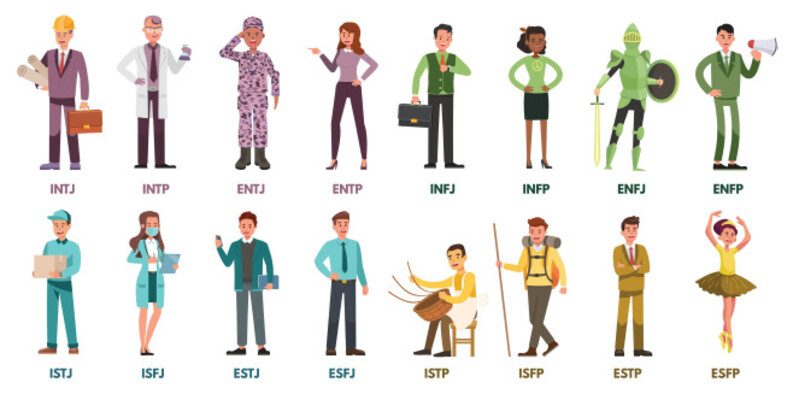

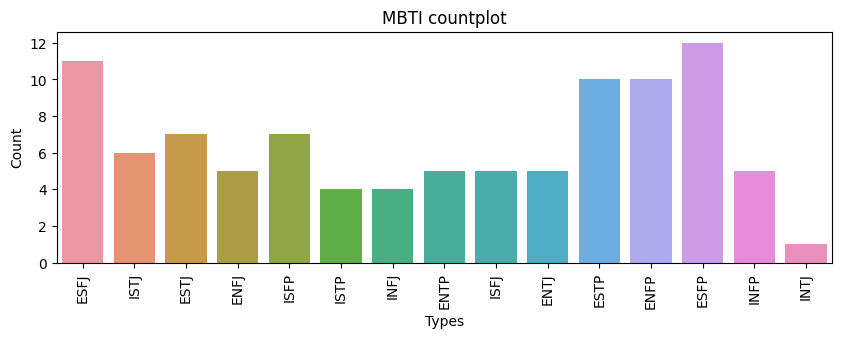

In [5]:
plot = sns.countplot(x='MBTI', data= df)

fig = plot.get_figure()
fig.set_size_inches(10, 3)
plt.xticks(rotation=90)
plt.title('MBTI countplot')
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

- As we see, heading comes ESFP, followed by ESFJ, and finally ESTP/ENFP together

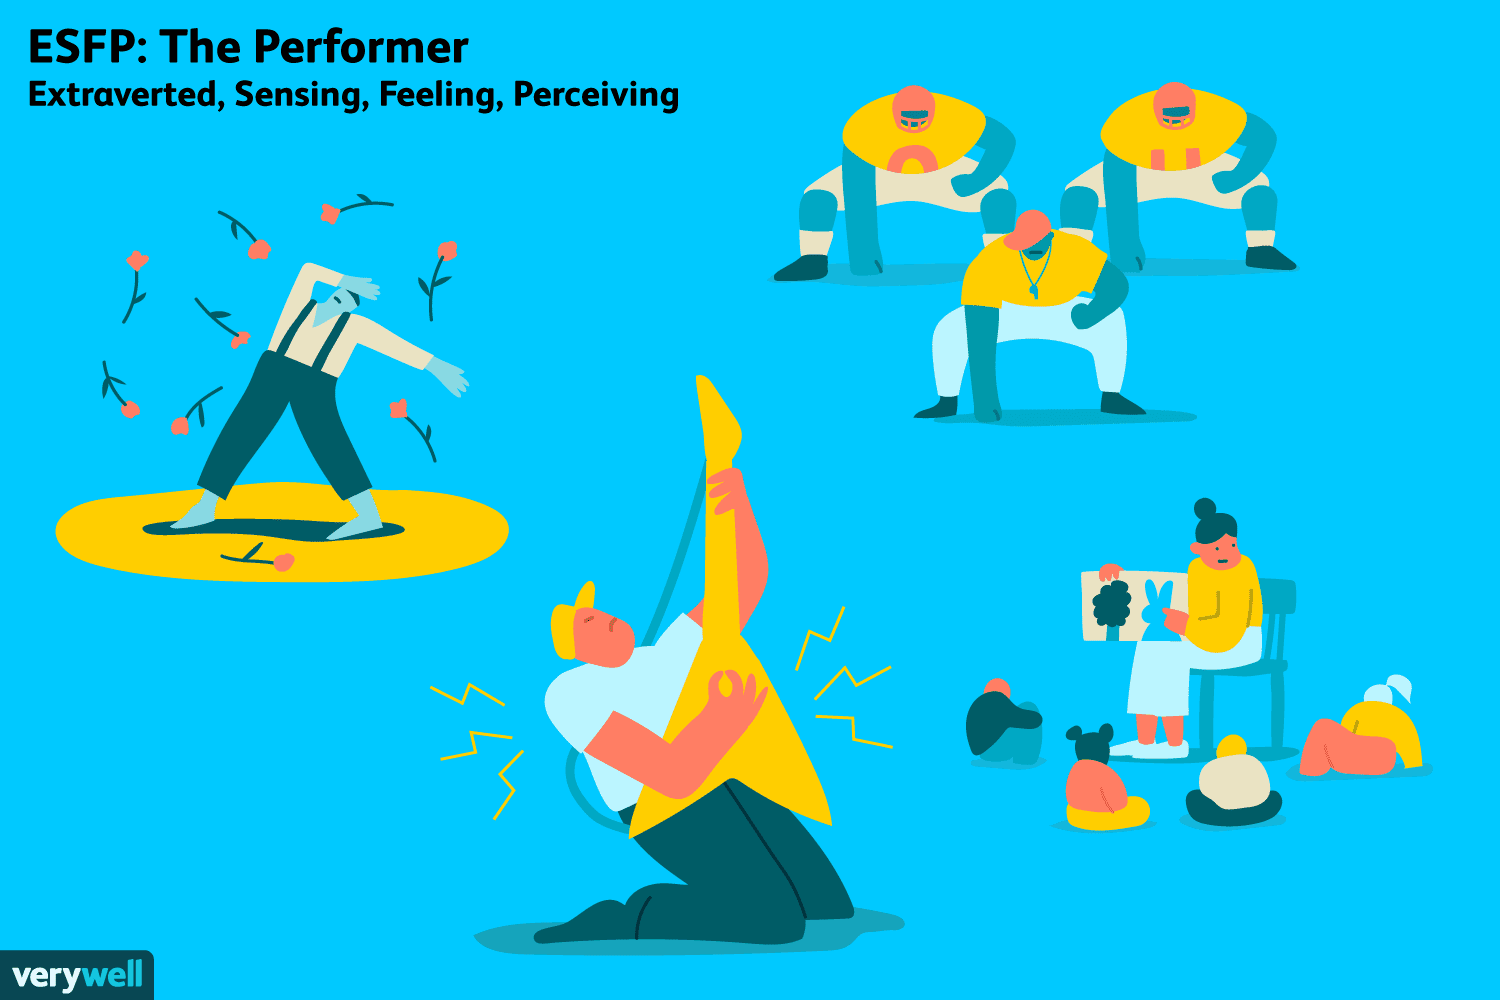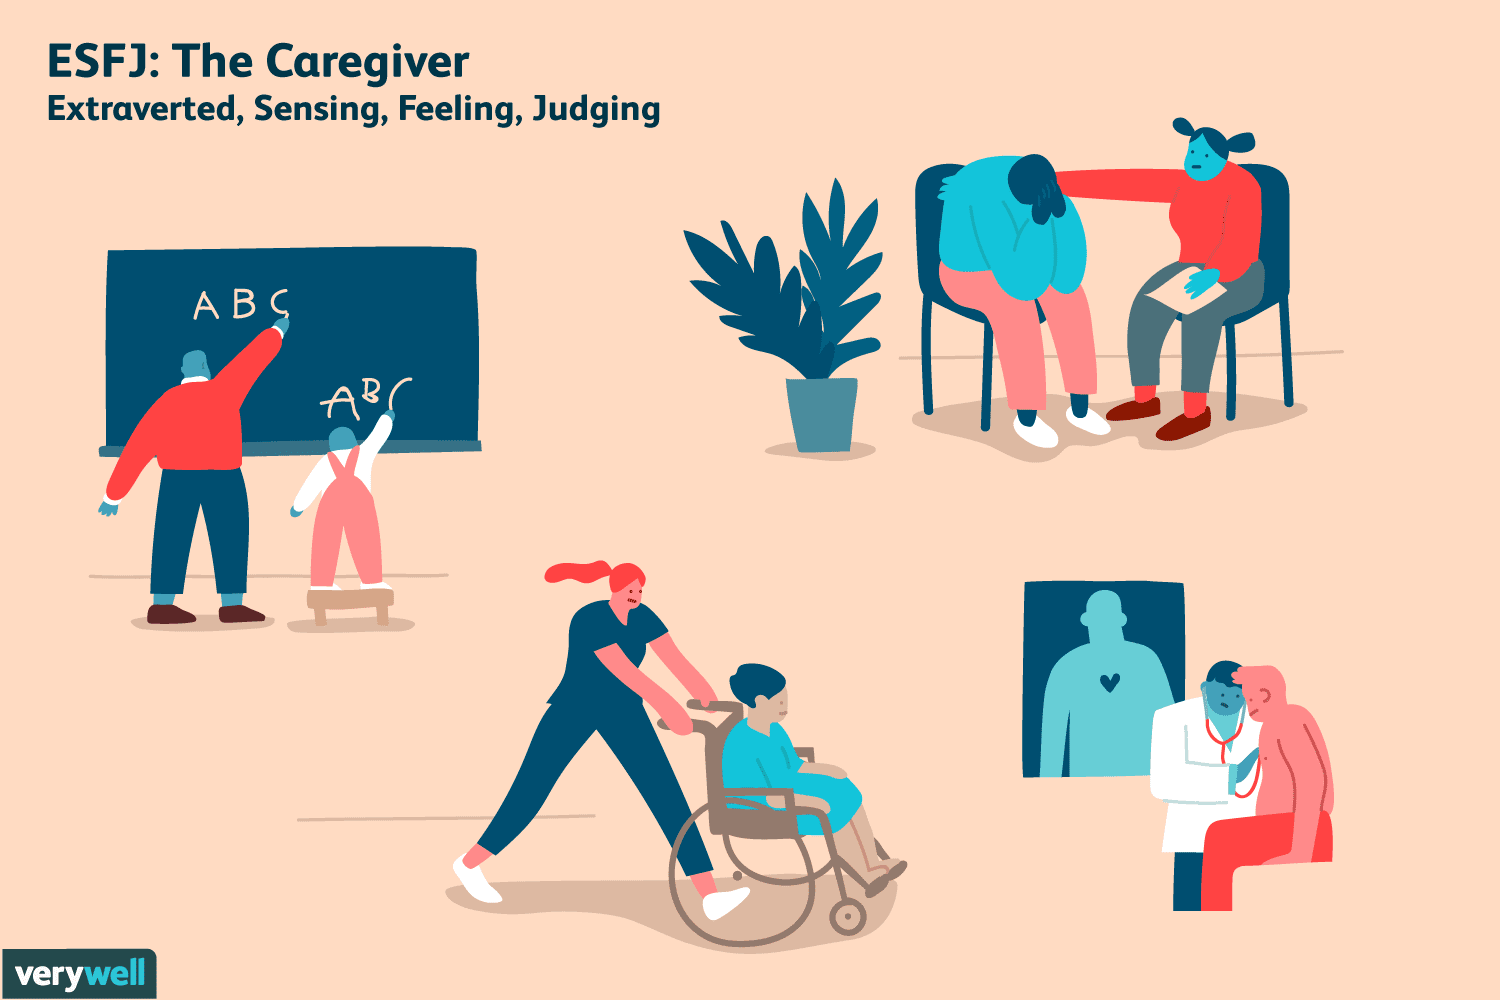   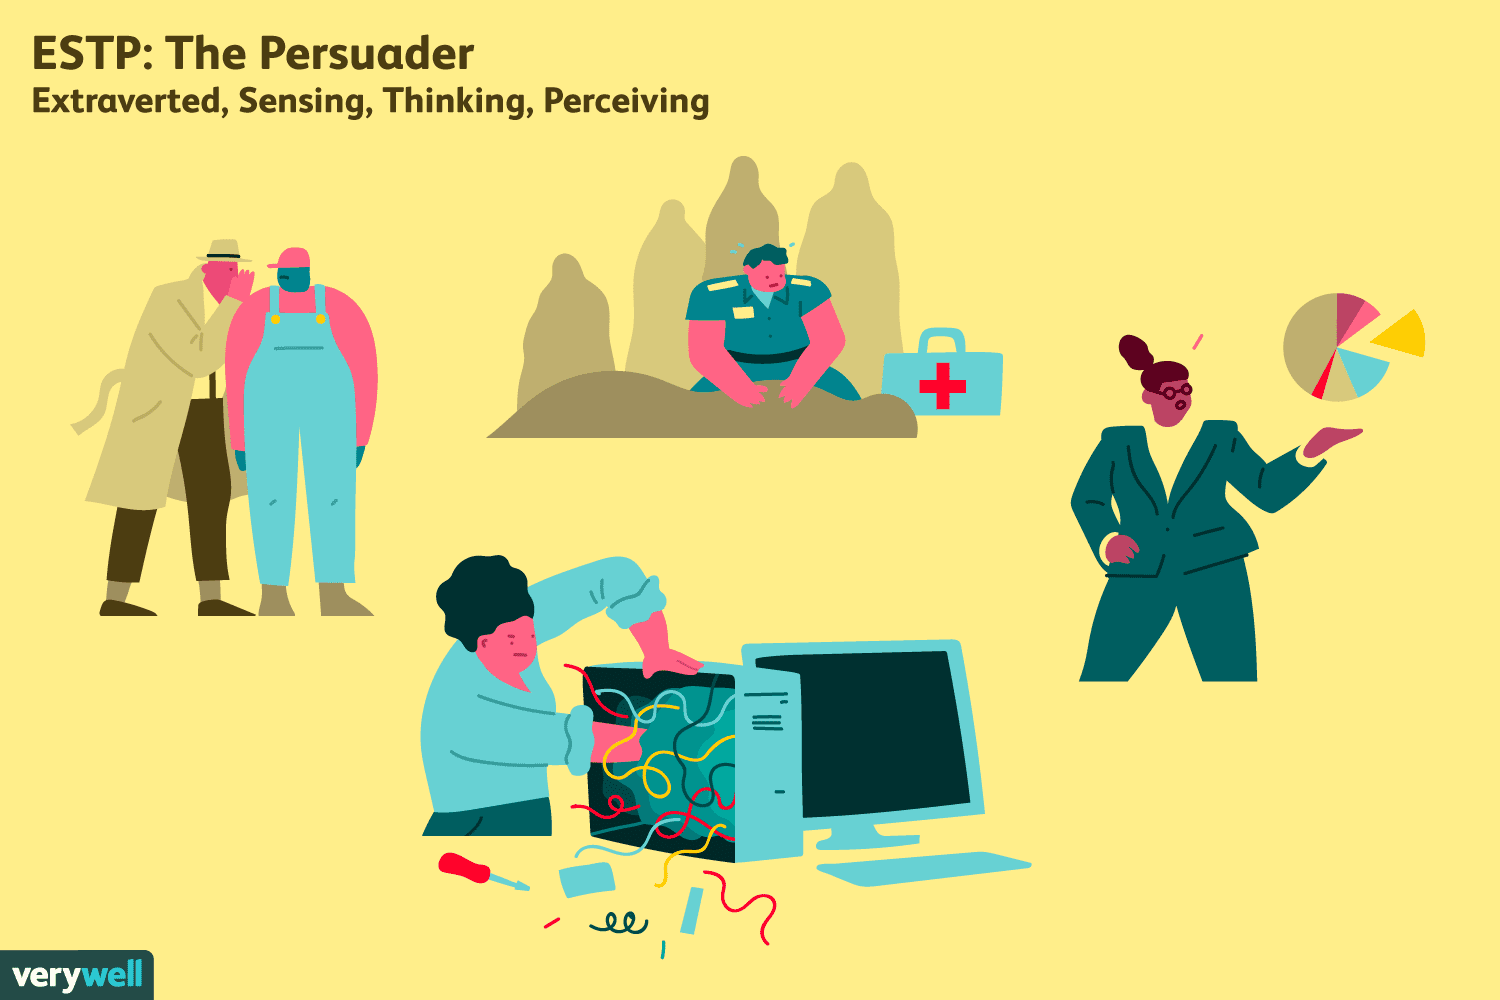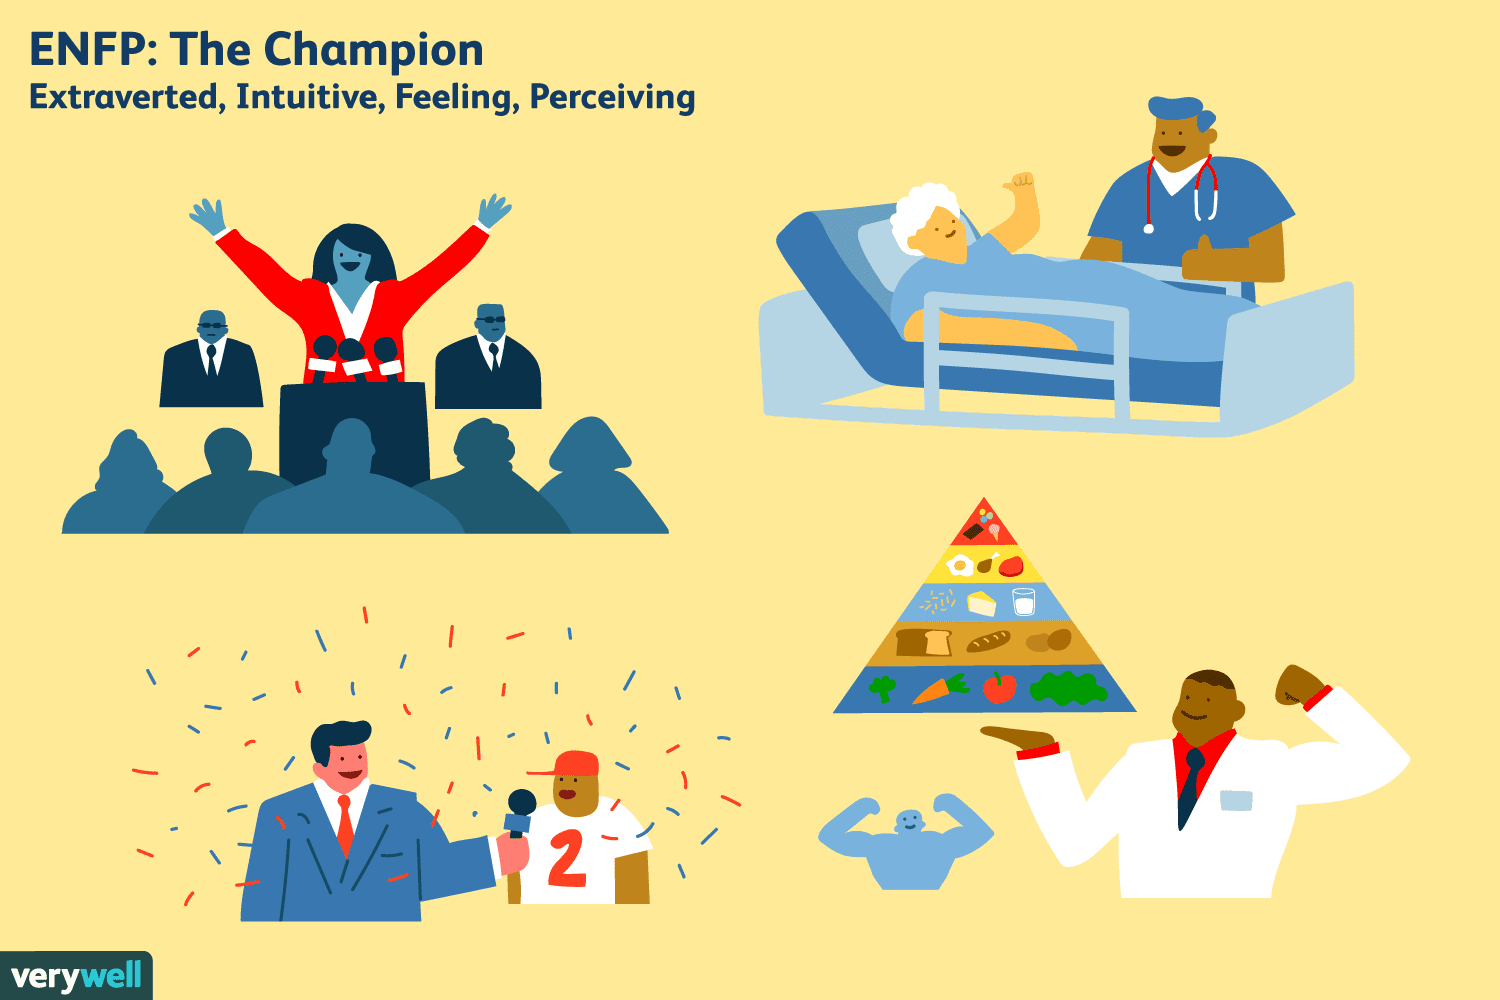

In [6]:
extroverts = df[df["E"] > df["I"]]
introverts = df[df["I"] >= df["E"]]

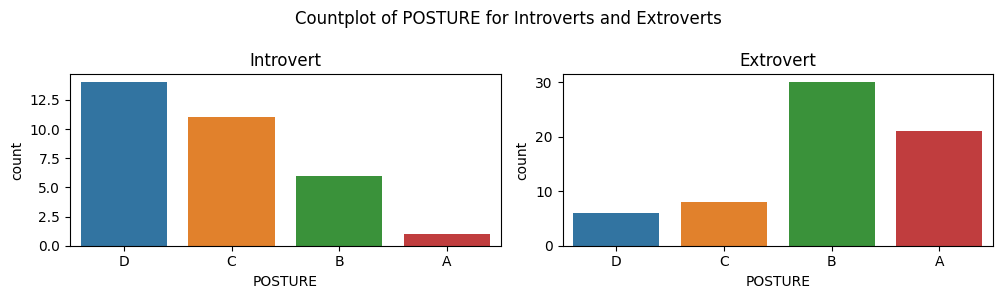

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x='POSTURE', data=introverts, ax=ax[0], order=introverts['POSTURE'].value_counts().index)
sns.countplot(x='POSTURE', data=extroverts, ax=ax[1], order=introverts['POSTURE'].value_counts().index)

ax[0].set_title("Introvert")
ax[1].set_title("Extrovert")
#.title('Postures between Introvert/Extrovert')
plt.suptitle("Countplot of POSTURE for Introverts and Extroverts")
plt.tight_layout()
plt.show()

- Seems like extroverts tends to have better posture (A : ideal-posture) 

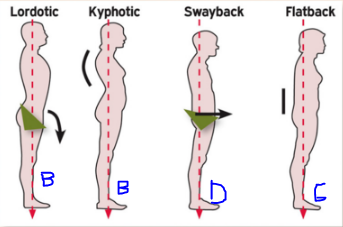

<AxesSubplot:xlabel='AGE'>

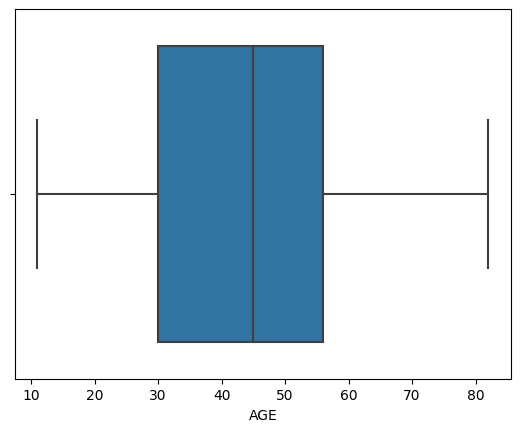

In [10]:
sns.boxplot(x = df.AGE)

- mean age in the dataset is 45 years

<AxesSubplot:xlabel='SEX', ylabel='count'>

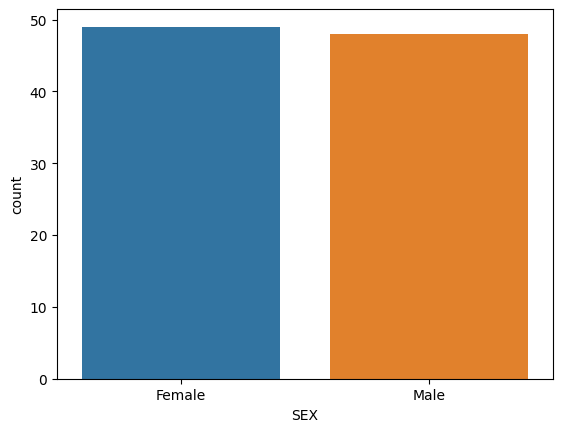

In [12]:
sns.countplot(x = df.SEX)

- Male and Female count is almost equal: 50 female, 49 male

<AxesSubplot:xlabel='ACTIVITY LEVEL', ylabel='WEIGHT'>

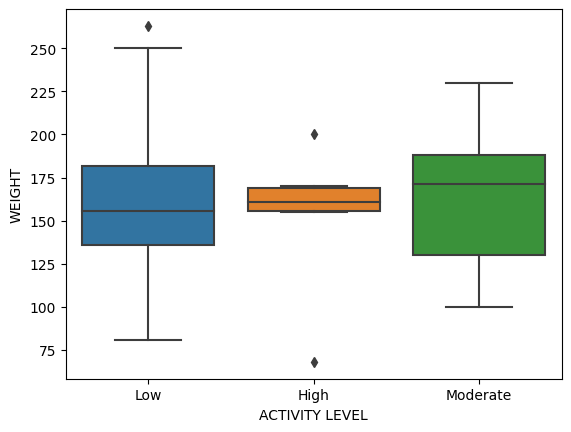

In [13]:
sns.boxplot(x = df["ACTIVITY LEVEL"], y = df.WEIGHT)